In [1]:
%matplotlib inline

In [2]:
##TODO postprocessing and filtering

In [3]:
import os,sys,glob
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pygeotools.lib import iolib,geolib,malib,warplib,timelib
from imview import pltlib
from itertools import combinations
from distutils.spawn import find_executable

In [4]:
%cd /nobackup/sbhusha1/oic_challenge/ridgecrast/Data-3_ETQ-Ridgecrest/Pleiades/Pleiades_ortho/

/nobackupp11/sbhusha1/oic_challenge/ridgecrast/Data-3_ETQ-Ridgecrest/Pleiades/Pleiades_ortho


In [6]:
ls 

Ort_Pleiades_2019RidgecrestEQ_20120528_UTM11N.tfw
Ort_Pleiades_2019RidgecrestEQ_20120528_UTM11N.tif
Ort_Pleiades_2019RidgecrestEQ_20190809_UTM11N.tfw
Ort_Pleiades_2019RidgecrestEQ_20190809_UTM11N.tif


In [7]:
date_list = ['20120528','20190809']
img_list = []
for idx,date in  enumerate(date_list):
    img = sorted(glob.glob(f'*{date}*.tif'))[0]
    img_list.append(img)
comb = list(combinations(img_list,2))
job_fn = '/nobackupp11/sbhusha1/oic_challenge/ridgecrast/results/phr_ortho/phr_ortho_jobs.txt'
with open(job_fn,'w') as f:
    for pairs in comb:
        img1,img2 = pairs
        cmd = '/swbuild/sbhusha1/pip_git_sw/debris_cover_smb/scripts/disp_mgm_corr.py'
        parameter_str = f" -dt px -skip_rate 1 -pleiades {os.path.abspath(img1)} {os.path.abspath(img2)}\n"
        f.write(cmd+parameter_str)

In [5]:
%cd /nobackup/sbhusha1/oic_challenge/ridgecrast/results/

/nobackupp11/sbhusha1/oic_challenge/ridgecrast/results


In [9]:
def write_out_oic_results_mgm_matching(vx_fn,vy_fn):
    t1, t2 = timelib.fn_getdatetime_list(vx_fn)
    vx_ds = iolib.fn_getds(vx_fn)
    vy_ds = iolib.fn_getds(vy_fn)
    disp_x,disp_y = [iolib.ds_getma(ds) for ds in [vx_ds,vy_ds]]
    t1_str = t1.strftime('%Y%m%d') 
    t2_str = t2.strftime('%Y%m%d') 
    dt = t2 - t1
    t_factor = timelib.get_t_factor(t1,t2)
    gt = vx_ds.GetGeoTransform()
    proj = vx_ds.GetProjection()
    ic_oc_vx_fn = os.path.join(ic_of_outdir,f'EW_{t1_str}-{t2_str}_raw.tif')
    ic_oc_vy_fn = os.path.join(ic_of_outdir,f'NS_{t1_str}-{t2_str}_raw.tif')
    iolib.writeGTiff(disp_x, ic_oc_vx_fn,ndv=-9999,gt=gt,proj=proj)
    iolib.writeGTiff(disp_y, ic_oc_vy_fn,ndv=-9999,gt=gt,proj=proj)
    
    disp_oc_vx_fn = os.path.join(displacement_outdir,f'EW_{t1_str}-{t2_str}_disp_tot.tif')
    disp_oc_vy_fn = os.path.join(displacement_outdir,f'NS_{t1_str}-{t2_str}_disp_tot.tif')
    res_x,res_y = geolib.get_res(vx_ds)
    iolib.writeGTiff(disp_x*res_x, disp_oc_vx_fn,ndv=-9999,gt=gt,proj=proj)
    iolib.writeGTiff(disp_y*res_y, disp_oc_vy_fn,ndv=-9999,gt=gt,proj=proj)
    
    vel_oc_vx_fn = os.path.join(velocity_outdir,f'EW_{t1_str}-{t2_str}_vel_mean.tif')
    vel_oc_vy_fn = os.path.join(velocity_outdir,f'NS_{t1_str}-{t2_str}_vel_mean.tif')
    iolib.writeGTiff((disp_x*res_x)/t_factor, vel_oc_vx_fn,ndv=-9999,gt=gt,proj=proj)
    iolib.writeGTiff((disp_y*res_y)/t_factor, vel_oc_vy_fn,ndv=-9999,gt=gt,proj=proj)

In [13]:
ls phr_ortho/

log/
Ort_Pleiades_2019RidgecrestEQ_20120528_UTM11N__Ort_Pleiades_2019RidgecrestEQ_20190809_UTM11N_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin/
phr_ortho_jobs.txt
ridgecrast_phr_ortho_long_redo.o19440027
ridgecrast_phr_ortho_long_redo.o19440194


In [10]:
outdir = 'asp_mgm/PHR_Ortho/'
ic_of_outdir = os.path.join(outdir,'IC-OF_RESULTS')
velocity_outdir = os.path.join(outdir,'VELOCITY')
displacement_outdir = os.path.join(outdir,'DISPLACEMENT')
if not os.path.exists(outdir):
    os.makedirs(outdir)
if not os.path.exists(ic_of_outdir):
    os.makedirs(ic_of_outdir)
if not os.path.exists(velocity_outdir):
    os.makedirs(velocity_outdir)
if not os.path.exists(displacement_outdir):
    os.makedirs(displacement_outdir)

In [14]:
vx_fn_list = sorted(glob.glob('phr_ortho/O*/*_vx*.tif'))
vy_fn_list = sorted(glob.glob('phr_ortho/O*/*_vy*.tif'))
print(f"The program produced {len(vx_fn_list)} velocity pairs")

The program produced 1 velocity pairs


In [17]:
for idx,vx_fn in enumerate(vx_fn_list):
    write_out_oic_results_mgm_matching(vx_fn,vy_fn_list[idx])

## Visualize

In [6]:
%cd /nobackup/sbhusha1/oic_challenge/ridgecrast/results/asp_mgm/

/nobackupp11/sbhusha1/oic_challenge/ridgecrast/results/asp_mgm


In [12]:
phr_ew_fn_list = sorted(glob.glob('PHR_Ortho/DISPLACEMENT/EW_*.tif'))
phr_ns_fn_list = sorted(glob.glob('PHR_Ortho/DISPLACEMENT/NS_*.tif'))

In [13]:
phr_ew_fn_list

['PHR_Ortho/DISPLACEMENT/EW_20120528-20190809_disp_tot.tif']

In [14]:
ew_ds_list = warplib.memwarp_multi_fn(phr_ew_fn_list,res=4)
ns_ds_list = warplib.memwarp_multi_fn(phr_ns_fn_list,res=4)



Warping all inputs to the following:
Resolution: 4.0
Extent: None
Projection: '+proj=utm +zone=11 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 1: PHR_Ortho/DISPLACEMENT/EW_20120528-20190809_disp_tot.tif
nl: 4054 ns: 2985 res: 4.000
100 - done.
0...10...20...30...40...50...60...70...80...90...
Warping all inputs to the following:
Resolution: 4.0
Extent: None
Projection: '+proj=utm +zone=11 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 1: PHR_Ortho/DISPLACEMENT/NS_20120528-20190809_disp_tot.tif
nl: 4054 ns: 2985 res: 4.000
100 - done.
0...10...20...30...40...50...60...70...80...90...

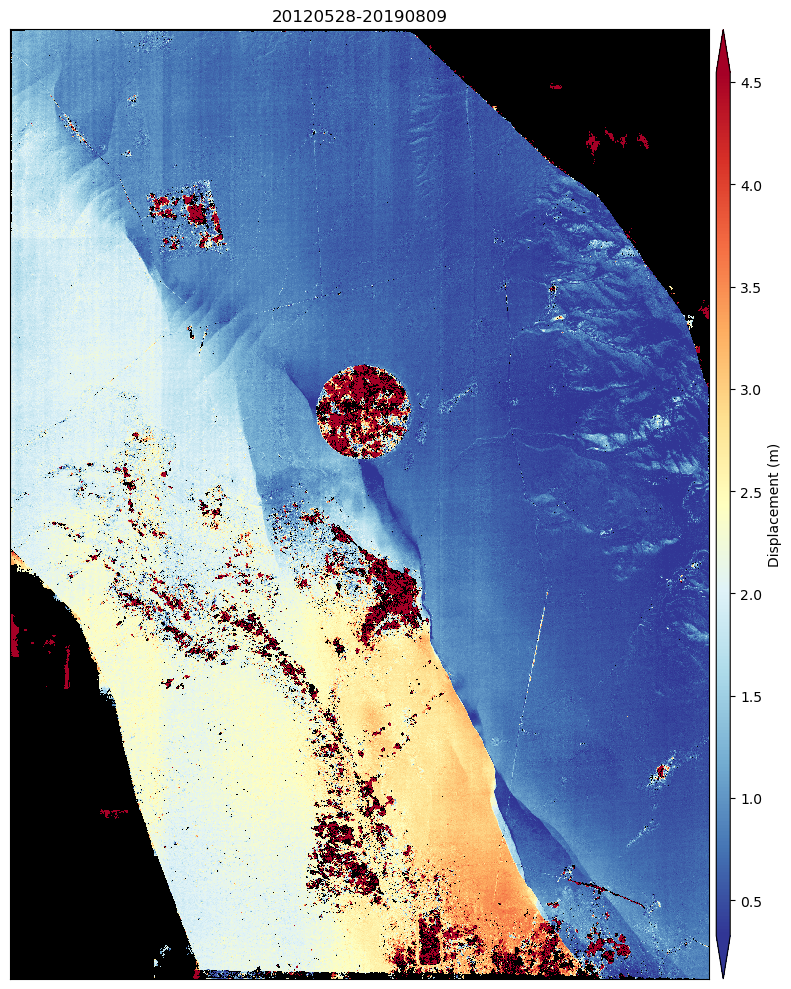

In [16]:
f,ax = plt.subplots(figsize=(10,10))

for idx,ds in enumerate(ew_ds_list):
    vx = iolib.ds_getma(ds)
    vy = iolib.ds_getma(ns_ds_list[idx])
    title = os.path.basename(phr_ew_fn_list[idx]).split('EW_')[1].split('_disp_tot')[0]
    pltlib.iv(np.ma.sqrt(vx**2+vy**2),title=title,label='Displacement (m)',cmap='RdYlBu_r',ax=ax)